# Traffic Sign Recognition using CNNs

- In this project, we explore the **German Traffic Sign Recognition Benchmark (GTSRB)**, a prominent multi-class classification challenge that was presented at the International Joint Conference on Neural Networks (IJCNN) 2011.
  
- The dataset consists of over **50,000 images** across **more than 40 classes**, providing a rich and lifelike database for traffic sign recognition. Our objective is to develop a robust model using **Convolutional Neural Networks (CNNs)** to accurately predict traffic signs from images.

- After training the model, we saved it as `traffic_signs_model.h5` and successfully uploaded it to **Hugging Face**. The model can be accessed via the following link: [Traffic Sign Detector](https://huggingface.co/spaces/comeis/traffic_sign_detector).

- The dataset can be accessed at the following link: [GTSRB Dataset](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data).

<div style="text-align: center;">
    <img src='https://i.ytimg.com/vi/oW6m7fABIGs/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLCEismMpUv63iZt66xCVnncDNgdvg' alt='Traffic Sign' width='60%'>
</div>

### Importing the necessary packages

In [38]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D, Dropout, Reshape, BatchNormalization
from sklearn.metrics import confusion_matrix

### Loading and Preprocessing The Dataset

In [6]:
img_path = 'images/'
labels = range(43)

In [7]:
img_list = []
label_list = []

for label in labels:
    label_path = os.path.join(img_path, str(label))
    img_files = [os.path.join(label_path, img_file) for img_file in os.listdir(label_path)]
    img_list.extend(img_files)
    label_list.extend([label] * len(img_files))

In [10]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [13]:
df.sample(10)

,img,label
8171,images/5/00005_00044_00024.png,5
5128,images/3/00003_00041_00003.png,3
4862,images/3/00003_00046_00001.png,3
11361,images/7/00007_00018_00027.png,7
12321,images/8/00008_00037_00019.png,8
30004,images/26/00026_00011_00003.png,26
22793,images/14/00014_00020_00028.png,14
38054,images/38/00038_00056_00013.png,38
10147,images/6/00006_00006_00008.png,6
19351,images/12/00012_00063_00015.png,12


In [16]:
df['encode_label']=df['label']

In [17]:
df.sample(10)

,img,label,encode_label
12540,images/8/00008_00023_00002.png,8,8
35284,images/35/00035_00024_00016.png,35,35
34405,images/35/00035_00019_00006.png,35,35
21086,images/13/00013_00004_00001.png,13,13
24286,images/17/00017_00032_00014.png,17,17
8378,images/5/00005_00027_00021.png,5,5
11280,images/7/00007_00015_00027.png,7,7
9492,images/5/00005_00049_00007.png,5,5
9624,images/5/00005_00041_00020.png,5,5
38645,images/40/00040_00006_00027.png,40,40


In [18]:
x=[]
for img in df['img']:
     img=cv2.imread(img)
     img=cv2.resize(img,(64,64)) 
     img=img/255.0
     x.append(img)

In [19]:
x=np.array(x) 

In [20]:
y=df['encode_label']

In [21]:
print(len(x),len(y)) 

39209 39209


### CNN Deep Learning Modelling

In [22]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [23]:
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(labels), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history=model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=5, verbose=1)

Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.6495 - loss: 1.3062 - val_accuracy: 0.9607 - val_loss: 0.1509
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9718 - loss: 0.1043 - val_accuracy: 0.9781 - val_loss: 0.0913
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9858 - loss: 0.0525 - val_accuracy: 0.9793 - val_loss: 0.0913
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9891 - loss: 0.0414 - val_accuracy: 0.9773 - val_loss: 0.1109
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9889 - loss: 0.0406 - val_accuracy: 0.9823 - val_loss: 0.0818


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,892,099 (18.66 MB)

 Trainable params: 1,630,699 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,261,400 (12.44 MB)

In [28]:
#model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


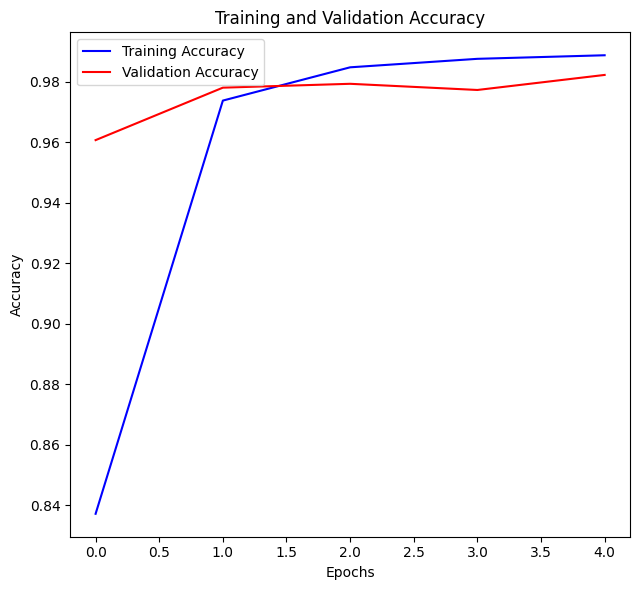

In [29]:
#training and validation accuracy
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

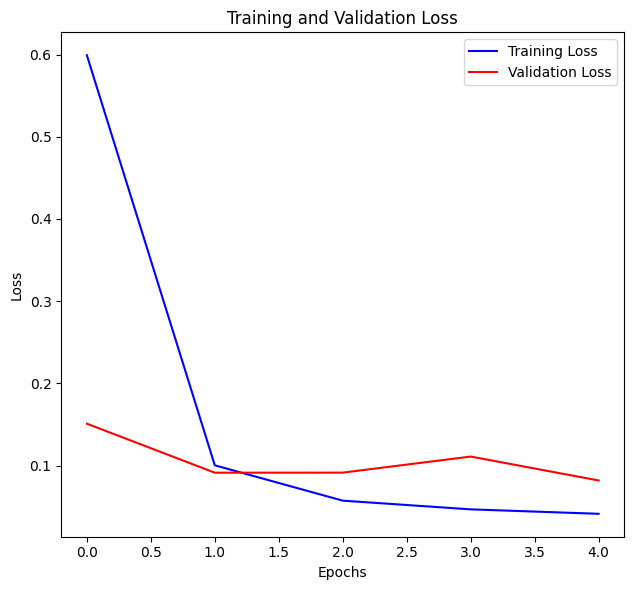

In [30]:
#training and validation loss
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

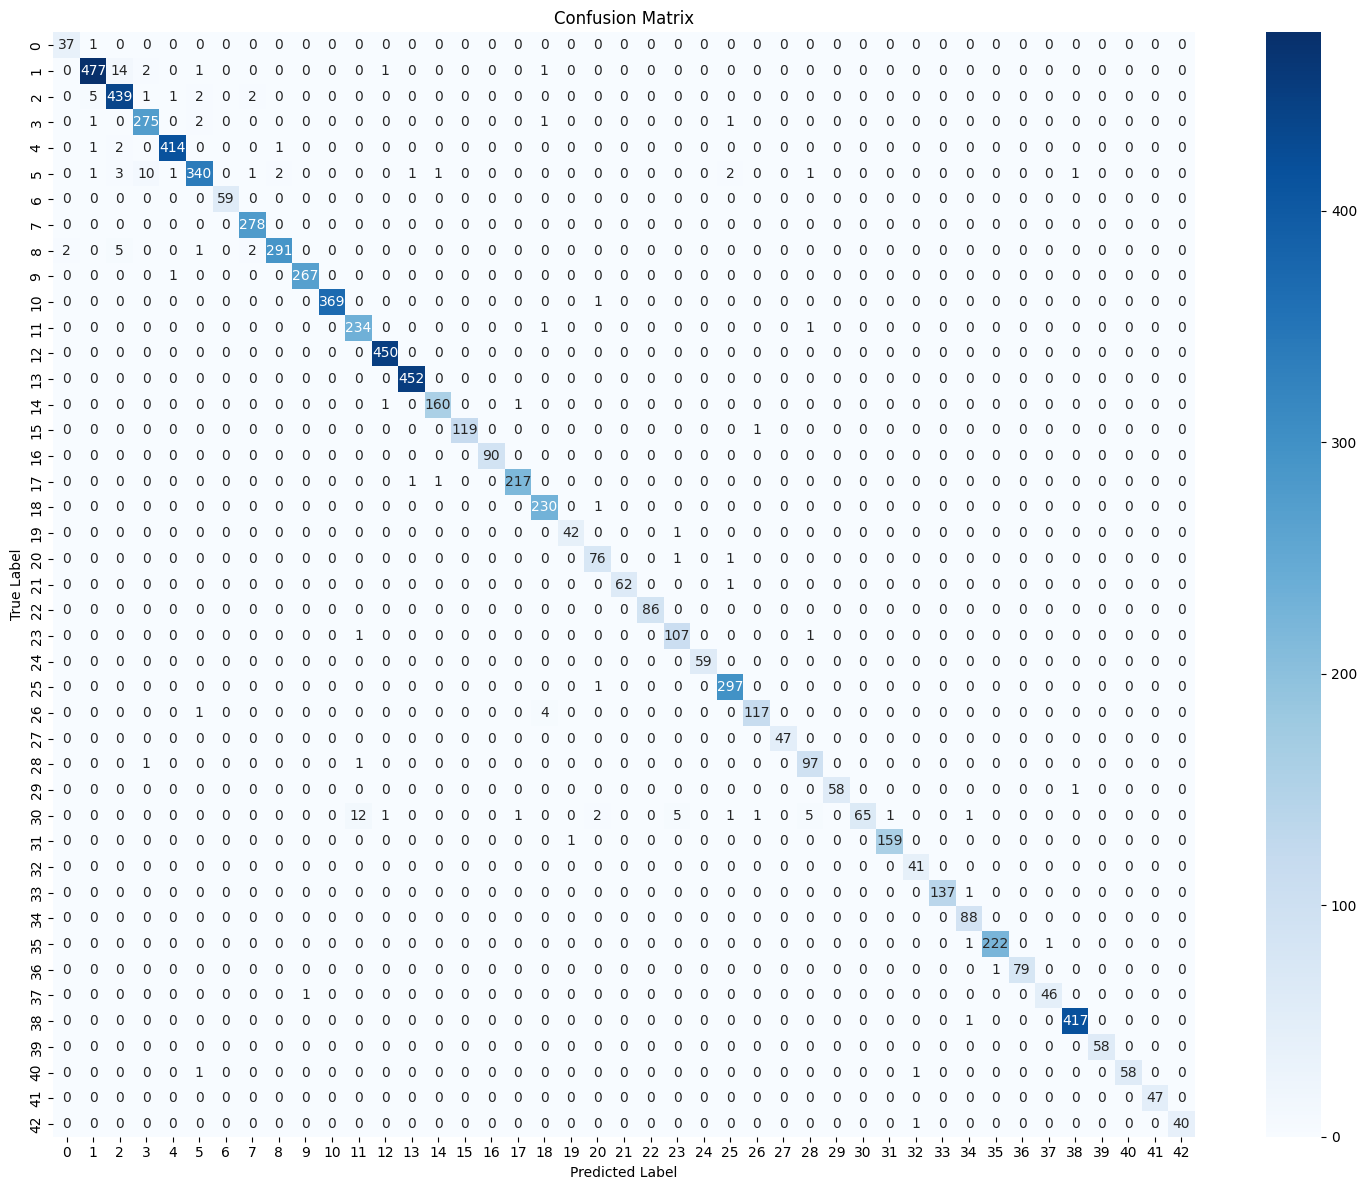

In [32]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [25]:
#saving the model as h5 file
model.save('traffic_signs_model.h5')

## Results and Evaluation

- Our model has achieved an impressive accuracy of over **98%** on the German Traffic Sign Recognition Benchmark (GTSRB) dataset, demonstrating its effectiveness in classifying traffic signs from images. This high level of accuracy indicates that our **Convolutional Neural Network (CNN)** is not only proficient in learning the intricate patterns of the various traffic signs but also generalizes well to unseen data. 

- The trained model, saved as `traffic_signs_model.h5`, has been deployed as an application on **Hugging Face** at the following link: [Traffic Sign Detector](https://huggingface.co/spaces/comeis/traffic_sign_detector).

- This application showcases the model's efficiency and reliability in real-time traffic sign recognition tasks. This accomplishment signifies a substantial contribution to the field of autonomous driving and reinforces the potential of deep learning in computer vision applications.